In [11]:
import os 
import numpy as np 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
parent_folder_saved_data = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet_training/hybrid_model_map_target/outputdata"
test_emmernet_path_folder = os.path.join(parent_folder_saved_data, "no_augmentation_dropout_bs_2_hybrid_modelmap_lr0001_{}k/saved_models/test_epochs/epoch_14")
variance_map_path = os.path.join(test_emmernet_path_folder, "emd_3061_epoch_14_emmernet_output_var.mrc")

variance_maps_dataset = {} 
dataset_size = [5, 10, 15, 20, 25]
variance_maps_dataset = {i: variance_map_path.format(i) for i in dataset_size}
for k, v in variance_maps_dataset.items():
    assert os.path.exists(v), "Variance map path does not exist: {}".format(v)

In [13]:
# add path for 30k and 60k
variance_maps_dataset[30] = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/emmernet/generating_model_map_hybrid/using_monte_carlo/iterations_15/emd_3061_hybrid_model_map_monte_carlo_var.mrc"
variance_maps_dataset[60] = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/emmernet/generating_model_map_hybrid/monte_carlo_60k/emd_3061_monte_carlo_60k_var.mrc"

emmap_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/emmernet/generating_model_map_hybrid/monte_carlo_60k/emd_3061_monte_carlo_60k_mean.mrc"
emmap, apix = load_map(emmap_path)

mask = (emmap >= 0.01).astype(bool)

In [14]:
variance_arrays = {}
for k, v in variance_maps_dataset.items():
    variance_map, _ = load_map(v)
    variance_array = variance_map[mask]
    variance_arrays[k] = variance_array



Text(0.5, 0, 'Dataset size')

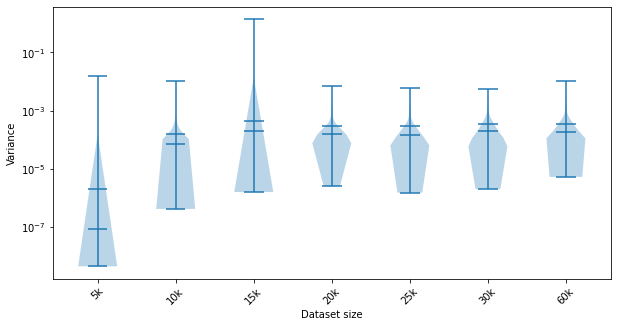

In [16]:
# plot the distribution of variance for each dataset 
variance_list = list(variance_arrays.values())
dataset_names = [f"{dataset}k" for dataset in variance_arrays.keys()]
plt.figure(figsize=(10, 5))
plt.violinplot(variance_list, showmeans=True, showmedians=True, showextrema=True)
plt.xticks(range(1, len(variance_list) + 1), dataset_names, rotation=45);
#plt.ylim(0, 0.02)
plt.yscale('log')
plt.ylabel("Variance")
plt.xlabel("Dataset size")



(0.0, 0.02)

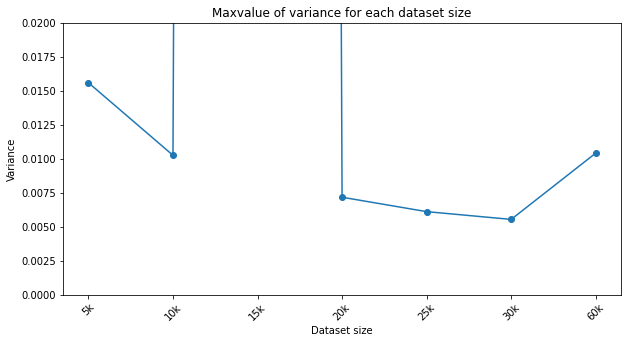

In [23]:
# plot only the top 1% of variance
variance_list = list(variance_arrays.values())
variance_max = [np.max(variance) for variance in variance_list]
dataset_names = [f"{dataset}k" for dataset in variance_arrays.keys()]
plt.figure(figsize=(10, 5))

plt.plot(variance_max, marker='o')
plt.xticks(range(0, len(variance_max)), dataset_names, rotation=45);
plt.ylabel("Variance")
plt.xlabel("Dataset size")
plt.title("Maxvalue of variance for each dataset size")
plt.ylim(0 , 0.02)


Variance of f:  246.564599
Variance of scaled_f:  2219.0813909999997
Multiplicative factor:  9.0


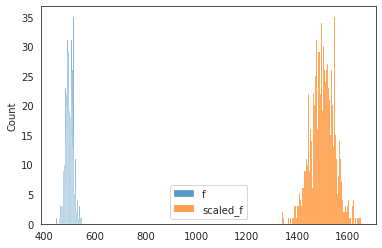

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f = np.random.binomial(n=1000, p=0.5, size=1000)

variance = np.var(f)

scalar = 3 
scaled_f = f * scalar

scaled_variance = np.var(scaled_f)

sns.histplot(f, bins=100, label="f")
sns.histplot(scaled_f, bins=100, label="scaled_f")
plt.legend()
print("Variance of f: ", variance)
print("Variance of scaled_f: ", scaled_variance)
print("Multiplicative factor: ", scaled_variance/variance)
